All features used

In [1]:
# Ignore warnings
import warnings
warnings.filterwarnings('ignore', category = FutureWarning)

In [2]:
# Import pandas libraries
import pandas as pd

# Load the dataset
data = pd.read_csv("Data/activemq_result.csv", delimiter=',')

# Explore the dataset
print(data.head()) 



                                         Method name  C20  C3  C4  C1  C5  C6  \
0  org.apache.activemq.transport.amqp.AmqpFramePa...    4  10   1   9   2   5   
1  org.apache.activemq.transport.amqp.AmqpHeader....    5   6   0   6   1   3   
2  org.apache.activemq.transport.amqp.AmqpHeader....    1  13   0  13   3   9   
3  org.apache.activemq.transport.amqp.AmqpInactiv...    1   5   0   5   1   3   
4  org.apache.activemq.transport.amqp.AmqpInactiv...    6   9   0   9   1   5   

   C2  C21  C18  ...  H4  H1  H2  H3       H12       H13       H14   H15  H5  \
0   0    2    4  ...   1   2   2   4  0.200000  0.200000  1.000000   4.0   1   
1   0    5    2  ...   1   1   3   4  0.333333  1.000000  0.333333   4.0   1   
2   0    9    3  ...   1  10   0  10  0.769231  0.000000  0.000000  10.0   1   
3   0    3    1  ...   1   2   0   2  0.400000  0.000000  0.000000   2.0   1   
4   0    4    3  ...   1   3   2   5  0.333333  0.222222  1.500000   5.0   1   

       bug-prone  
0  not bug-pr

In [3]:
# Check missing value
data.isna().sum() # get missing value count of each column

# check missing values
data.isnull().values.any() # no missing values


False

In [4]:
import numpy as np

data.replace([np.inf, -np.inf], np.nan, inplace=True)

# Check missing value
data.isna().sum() # get missing value count of each column

Method name    0
C20            0
C3             0
C4             0
C1             0
C5             0
C6             0
C2             0
C21            0
C18            0
C8             0
C9             0
C10            0
C17            0
C19            0
C7             0
C11            0
C12            0
C13            0
C14            0
C15            0
C16            0
H6             0
H7             0
H8             0
H9             0
H10            0
H11            0
H16            0
H17            0
H18            0
H19            0
H4             0
H1             0
H2             0
H3             0
H12            0
H13            0
H14            0
H15            0
H5             0
bug-prone      0
dtype: int64

In [5]:
import numpy as np
import pandas as pd

# Calculate percentiles
c1_50 = np.percentile(data['C1'], 50)

# Subset 1: small: C1 < 50th percentile
data_s = data[data['C1'] < c1_50]

# Subset 2: large: C1 >= 50th percentile
data_l = data[data['C1'] >= c1_50]


In [6]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of seaborn
sns.set(style="whitegrid")

def plot_all_distributions(df):
    # Number of columns in the dataframe
    num_features = df.shape[1]
    
    
    # Create a figure with subplots
    fig, axes = plt.subplots(8, 5, figsize=(15, 24))
    
    # Flatten axes array for easy iteration
    axes = axes.flatten()
    
    # Plot each feature
    for i, column in enumerate(df.columns):
        sns.histplot(df[column], kde=True, stat="density", bins=30, color='blue', alpha=0.6, ax=axes[i])
        sns.kdeplot(df[column], color='red', linewidth=2, ax=axes[i])
        axes[i].set_title(f'Distribution of {column}')
    
    # Hide any unused subplots
    for i in range(len(df.columns), len(axes)):
        axes[i].axis('off')
    
    # Adjust layout
    plt.tight_layout()
    plt.show()

# Select numerical columns only
df_s = data_s.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')
df_l = data_l.select_dtypes(include=['number']).apply(pd.to_numeric, downcast='float')



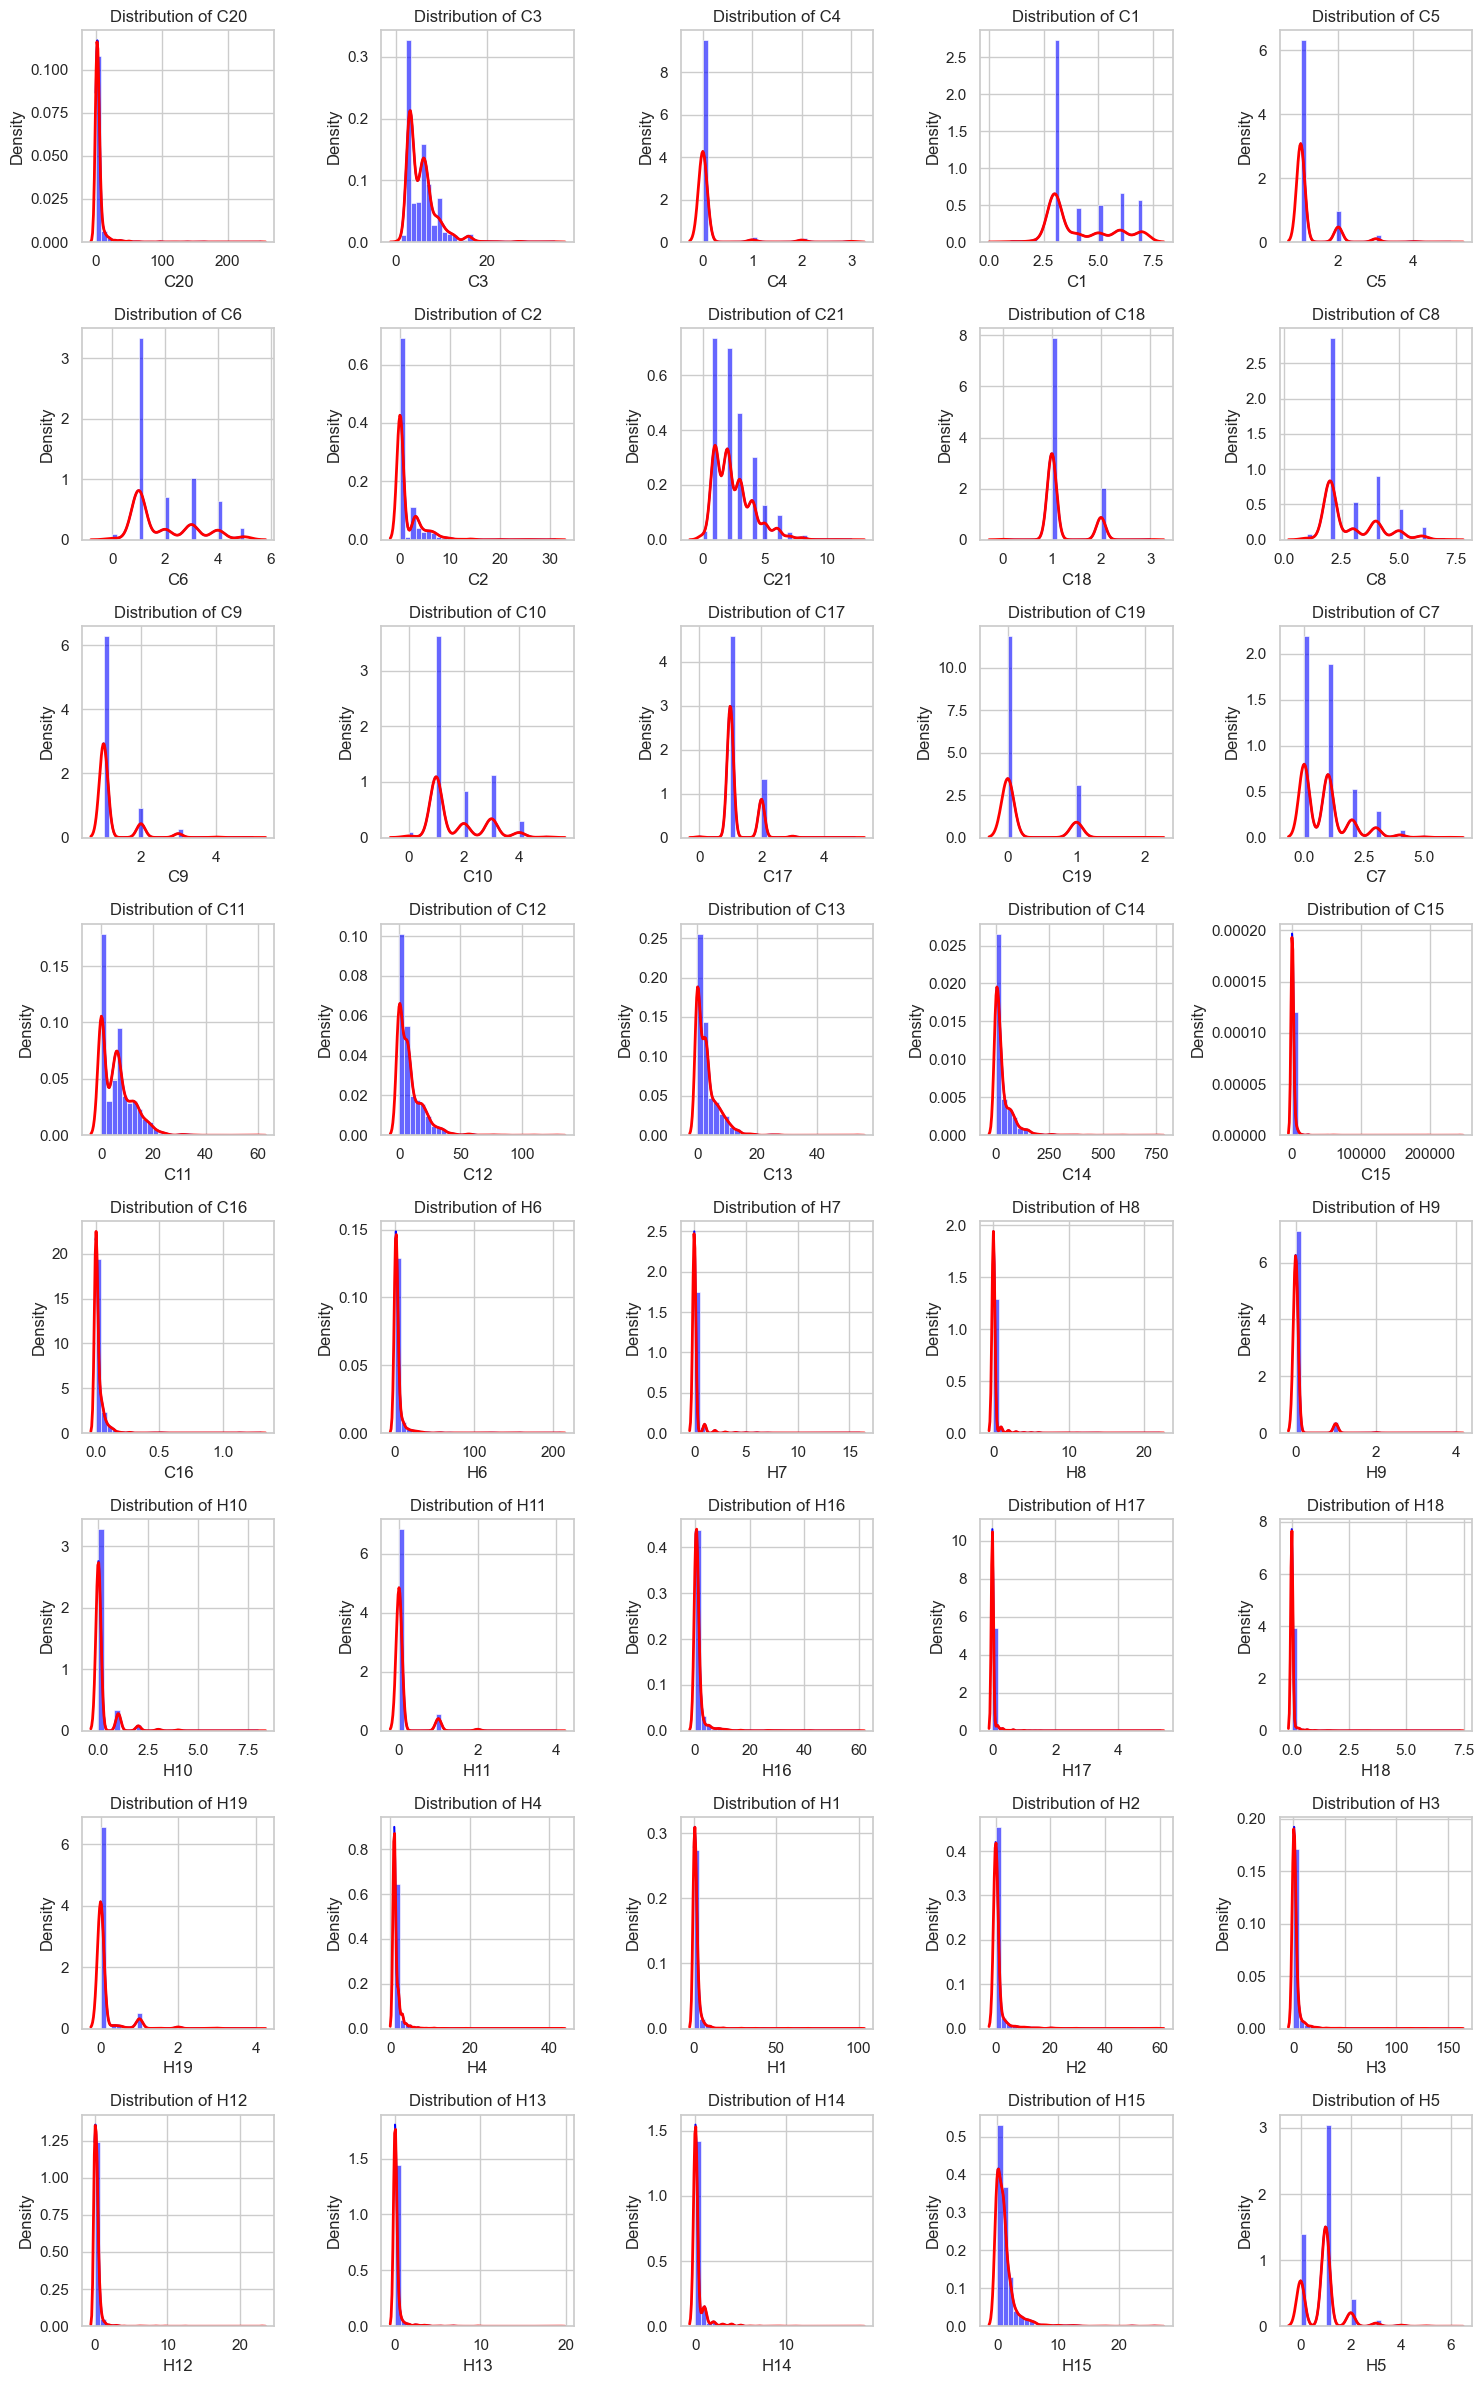

In [7]:
# Plot all distributions
plot_all_distributions(df_s)

array([[<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C3'}>,
        <Axes: title={'center': 'C4'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'center': 'C18'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: title={'center': 'C10'}>],
       [<Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C19'}>,
        <Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C11'}>,
        <Axes: title={'center': 'C12'}>, <Axes: title={'center': 'C13'}>],
       [<Axes: title={'center': 'C14'}>, <Axes: title={'center': 'C15'}>,
        <Axes: title={'center': 'C16'}>, <Axes: title={'center': 'H6'}>,
        <Axes: title={'center': 'H7'}>, <Axes: title={'center': 'H8'}>],
       [<Axes: title={'center': 'H9'}>, <Axes: title={'center': 'H10'}>,
        <Axes: title={'center': 'H11'}>, <Axes:

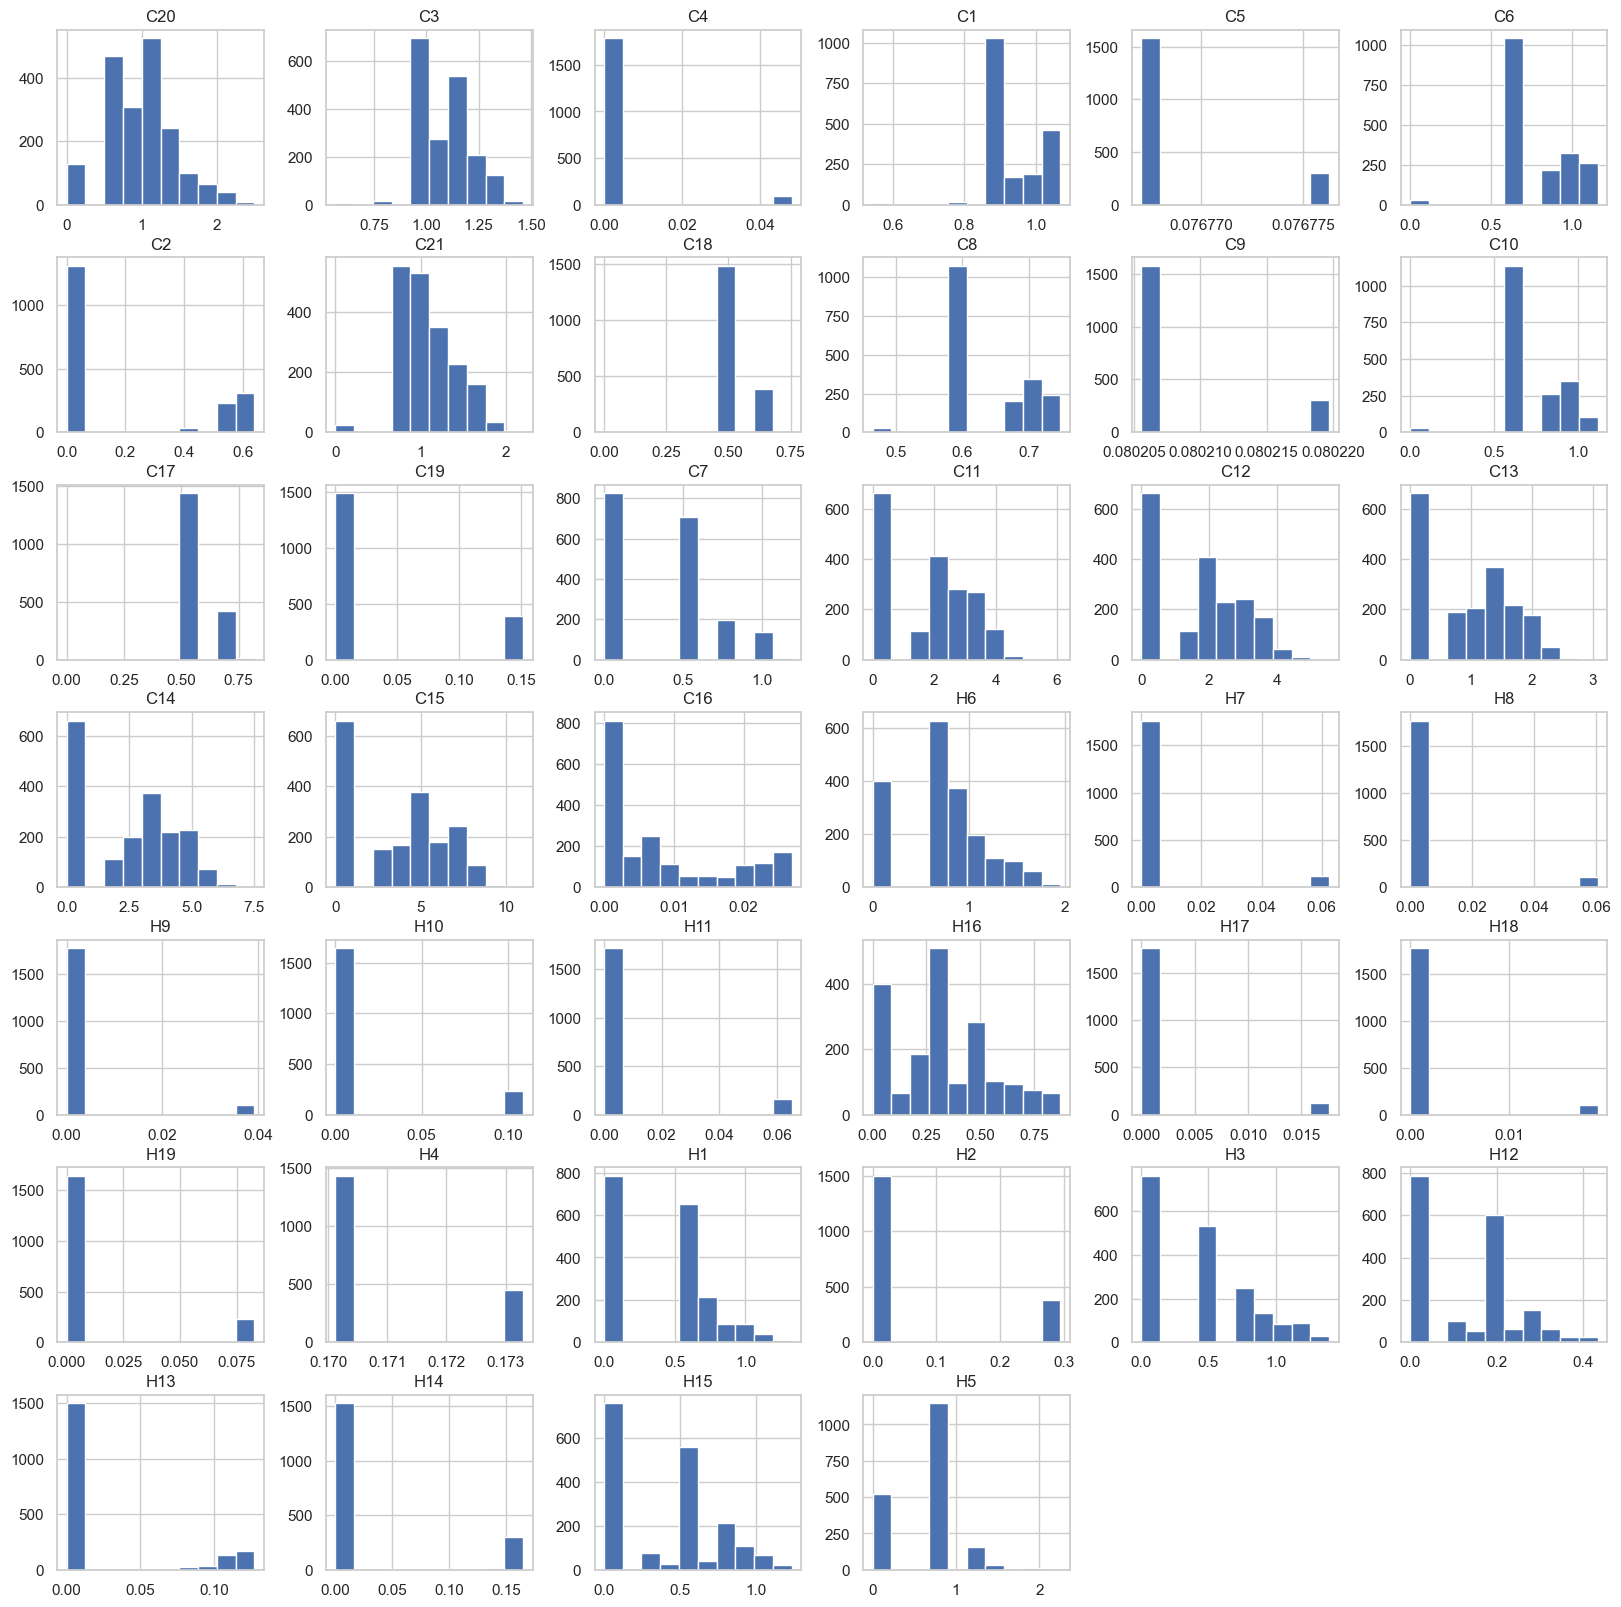

In [8]:

# copy data
data_transform_s = data_s.copy()


# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
from scipy import stats

# Apply Box-Cox transformation to each variable
for var in df_s.columns:
    # Adding 1 to handle zero values
    transformed, _ = stats.boxcox(data_transform_s[var] + 1)
    data_transform_s[var] = transformed


# Check the distribution after transformation
data_transform_s[df_s.columns].hist(figsize=(20, 20))


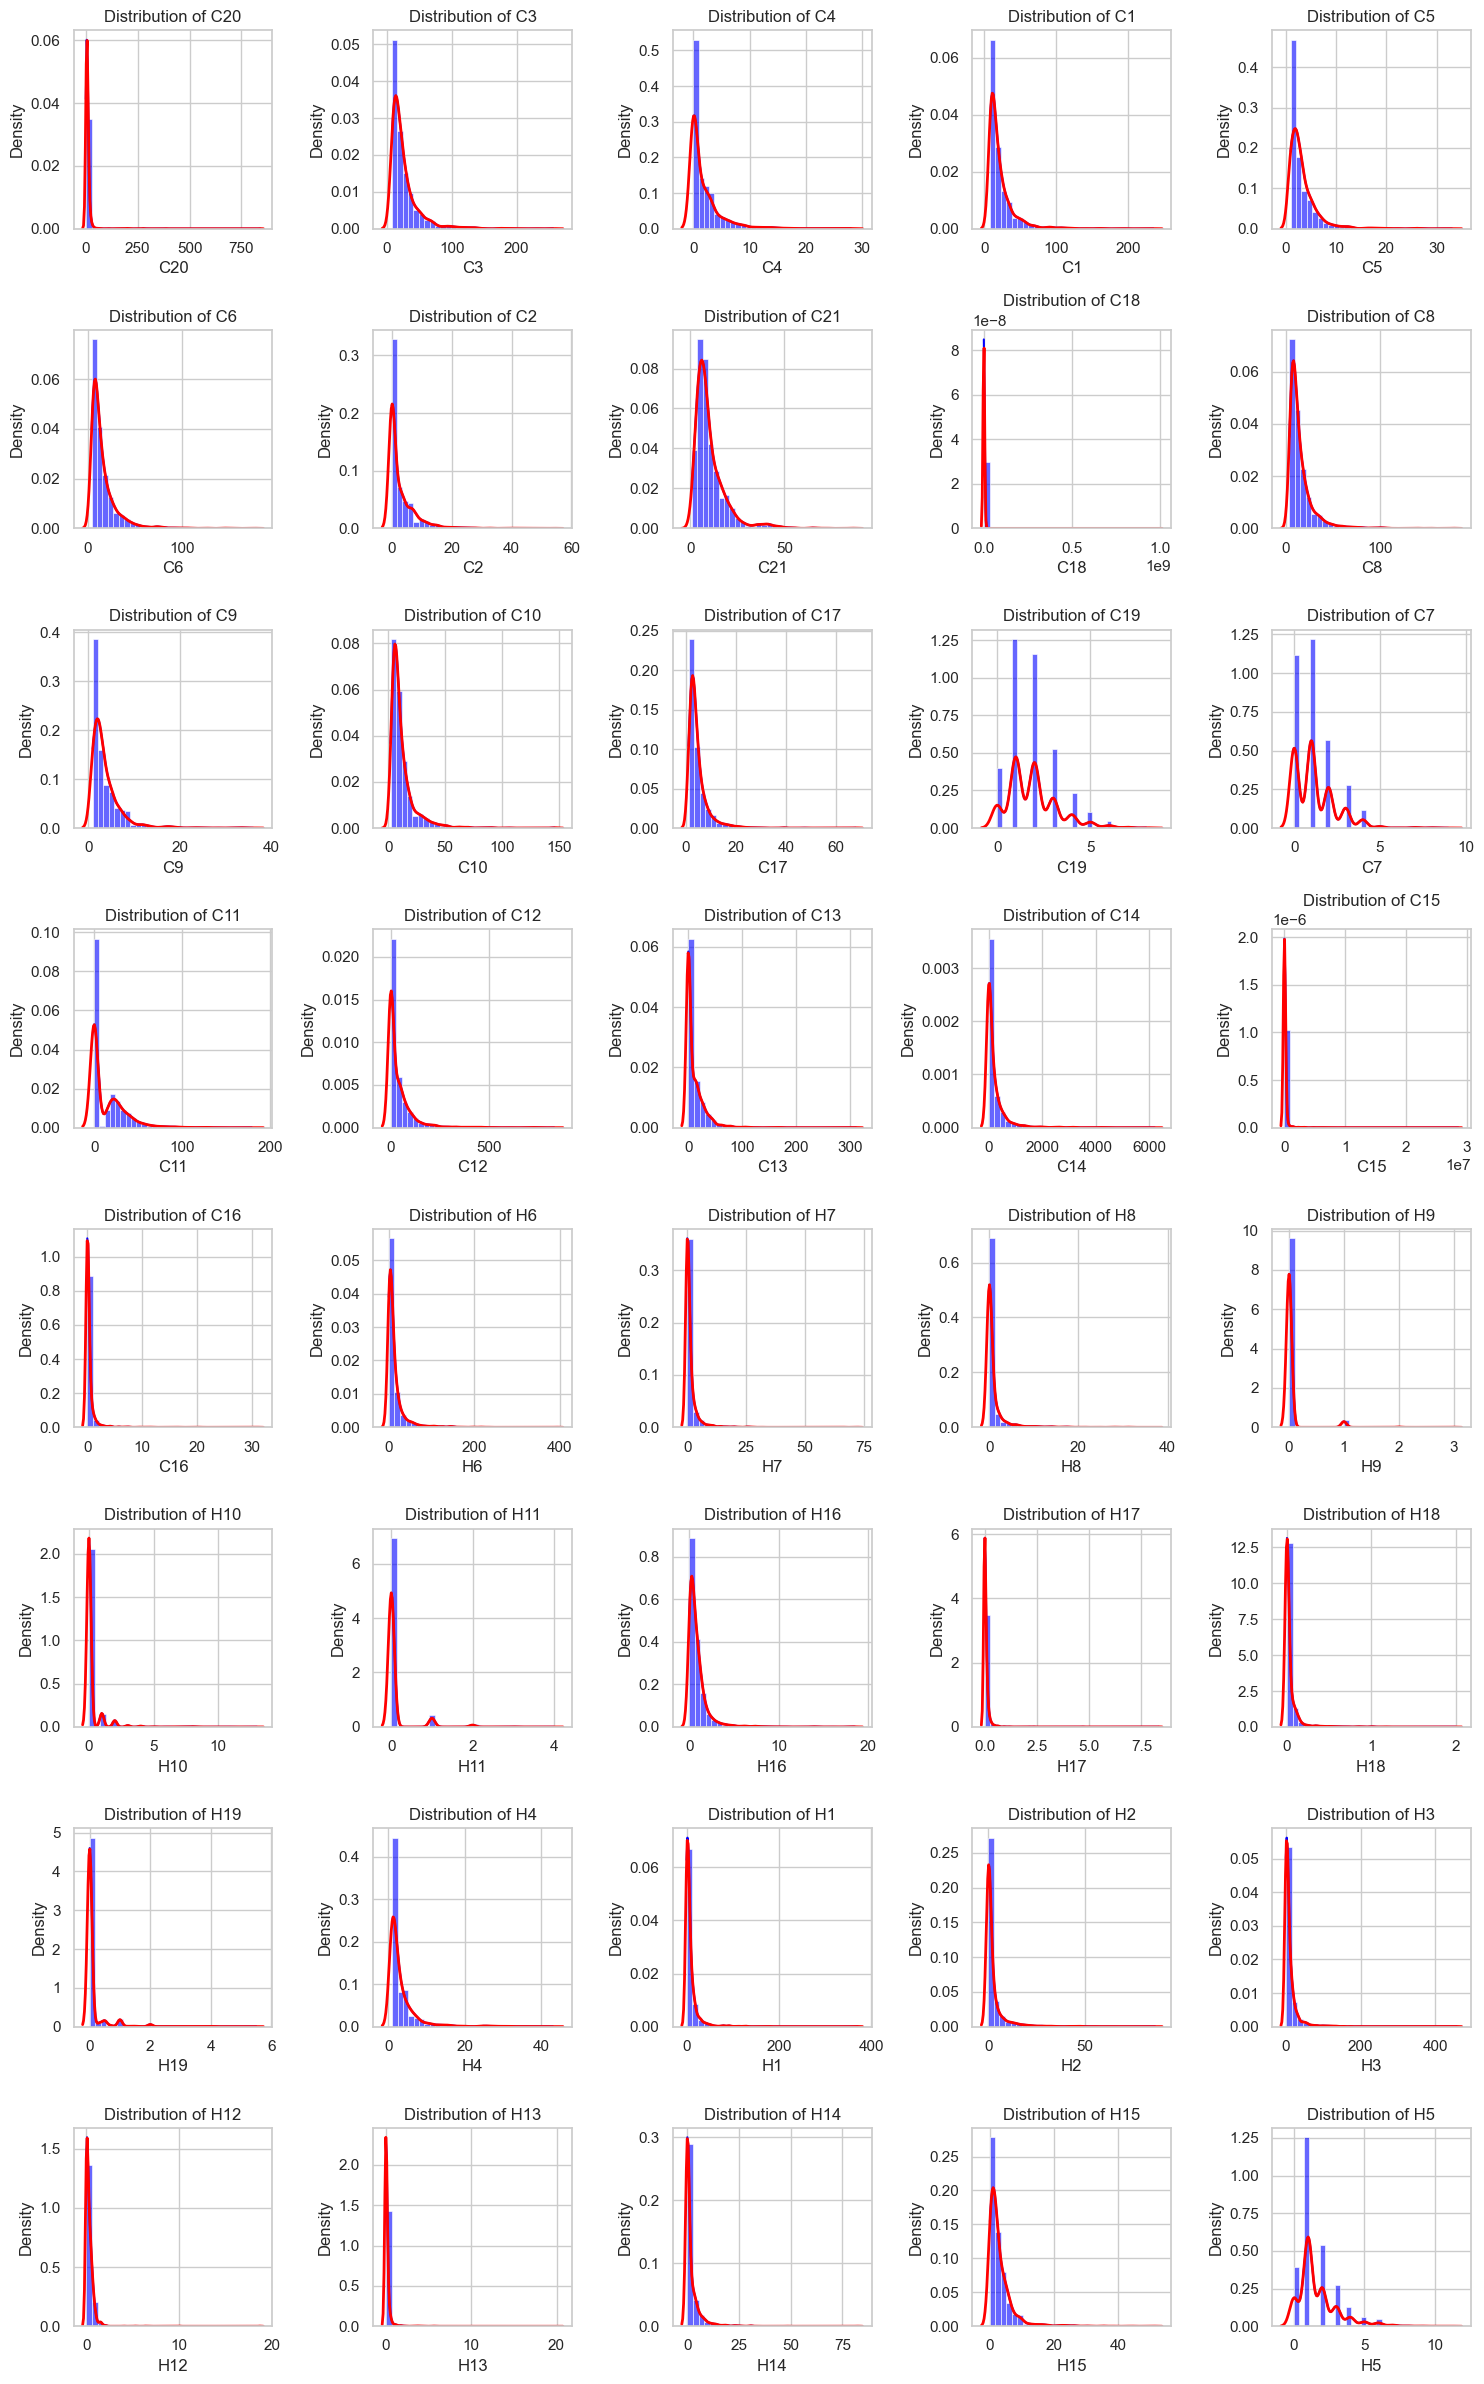

In [9]:
# Plot all distributions
plot_all_distributions(df_l)

array([[<Axes: title={'center': 'C20'}>, <Axes: title={'center': 'C3'}>,
        <Axes: title={'center': 'C4'}>, <Axes: title={'center': 'C1'}>,
        <Axes: title={'center': 'C5'}>, <Axes: title={'center': 'C6'}>],
       [<Axes: title={'center': 'C2'}>, <Axes: title={'center': 'C21'}>,
        <Axes: title={'center': 'C18'}>, <Axes: title={'center': 'C8'}>,
        <Axes: title={'center': 'C9'}>, <Axes: title={'center': 'C10'}>],
       [<Axes: title={'center': 'C17'}>, <Axes: title={'center': 'C19'}>,
        <Axes: title={'center': 'C7'}>, <Axes: title={'center': 'C11'}>,
        <Axes: title={'center': 'C12'}>, <Axes: title={'center': 'C13'}>],
       [<Axes: title={'center': 'C14'}>, <Axes: title={'center': 'C15'}>,
        <Axes: title={'center': 'C16'}>, <Axes: title={'center': 'H6'}>,
        <Axes: title={'center': 'H7'}>, <Axes: title={'center': 'H8'}>],
       [<Axes: title={'center': 'H9'}>, <Axes: title={'center': 'H10'}>,
        <Axes: title={'center': 'H11'}>, <Axes:

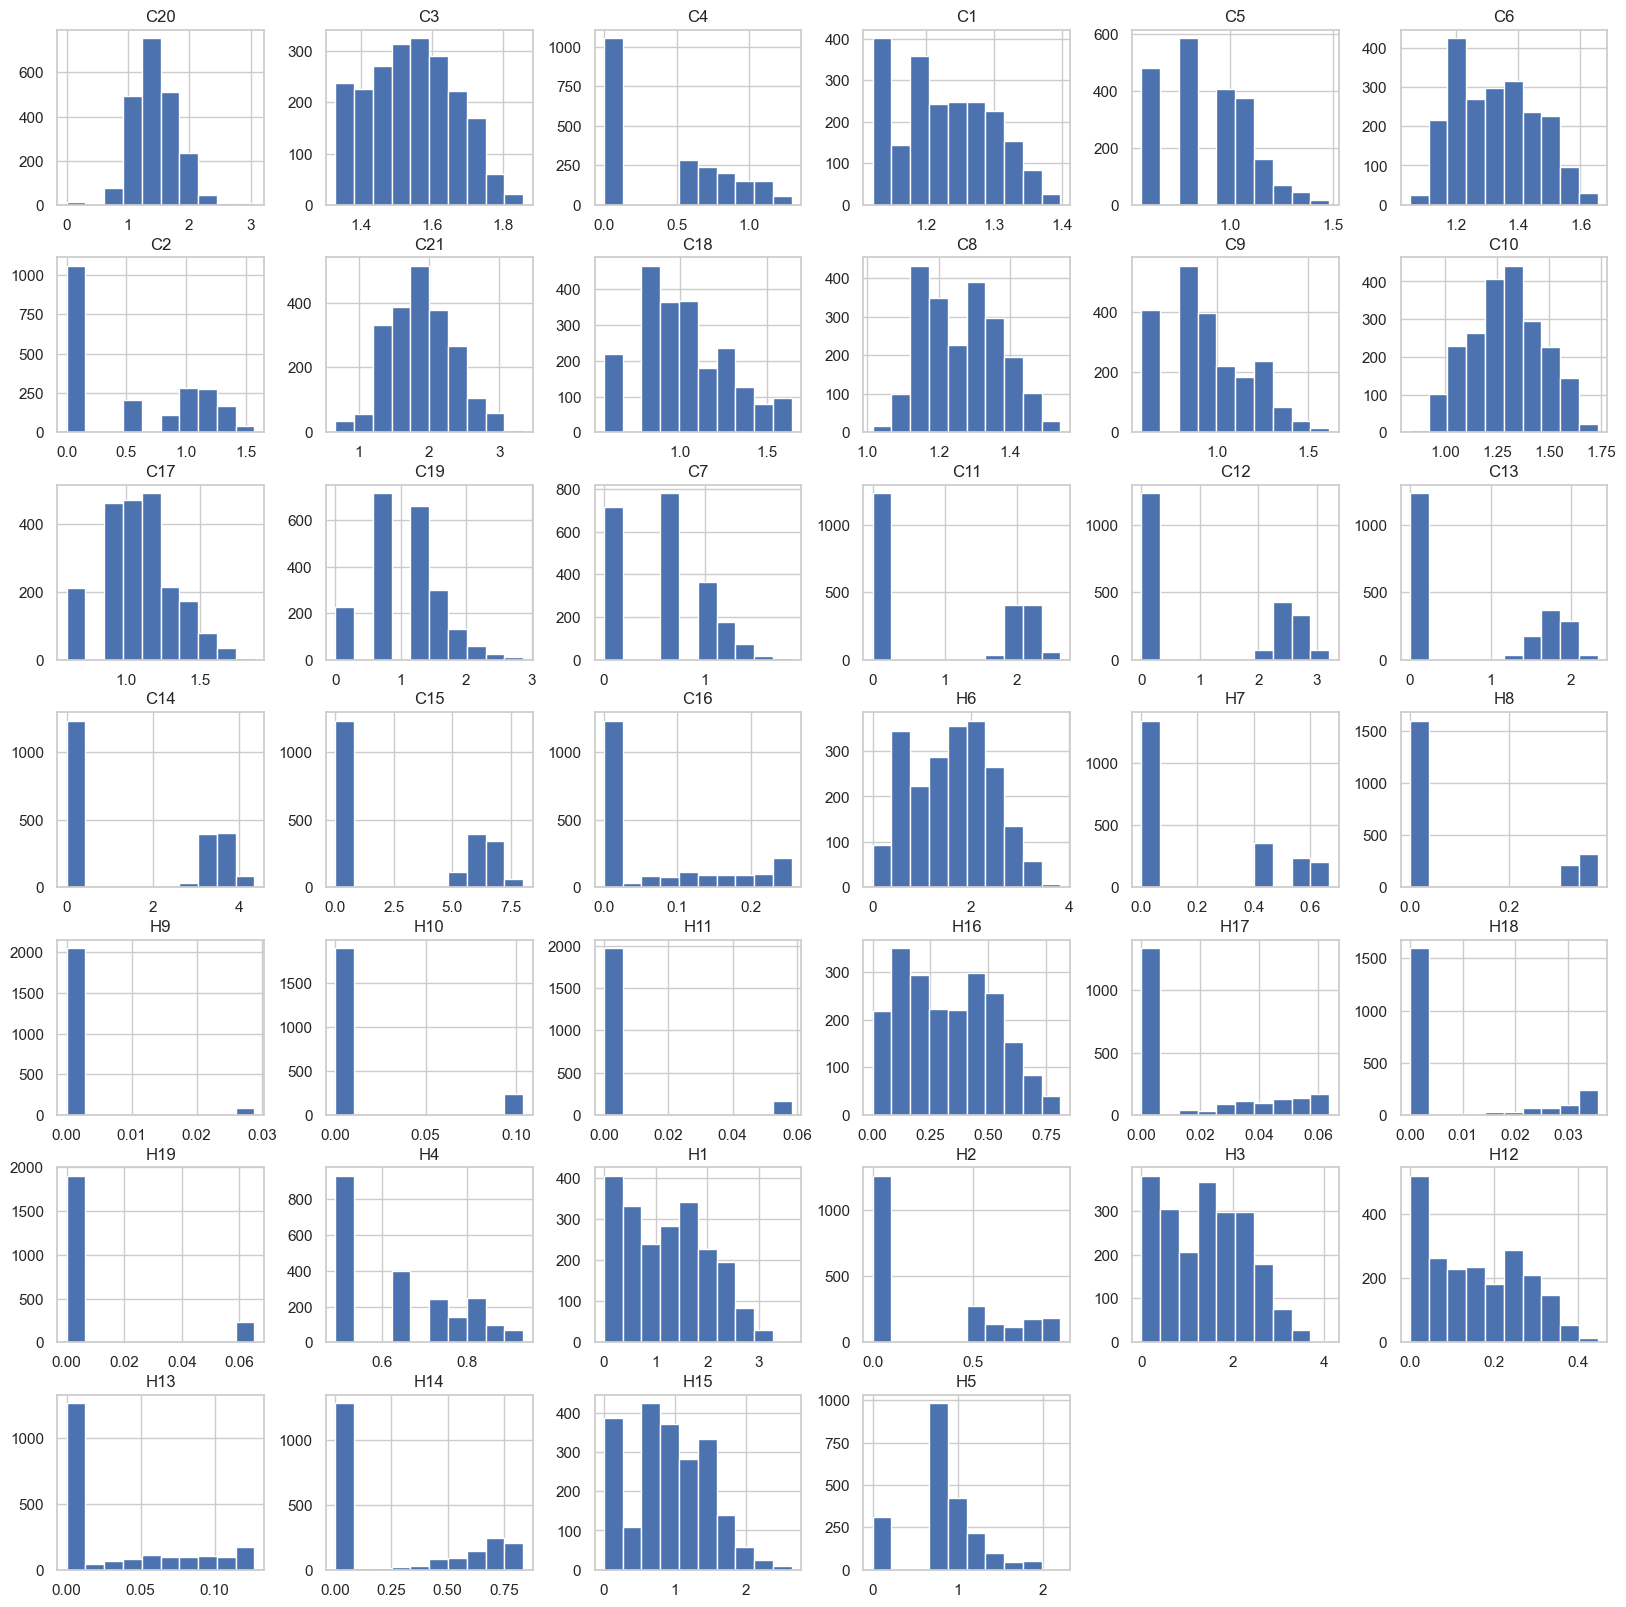

In [10]:

# copy data
data_transform_l = data_l.copy()

# Apply a Box-Cox transformation to the variables with right-skewed distributions since following columns are not transform
# to symmetrical distribution by using logarithmic transformation.

# Import scipy
from scipy import stats

# Apply Box-Cox transformation to each variable
for var in df_l.columns:
    # Adding 1 to handle zero values
    transformed, _ = stats.boxcox(data_transform_l[var] + 1)
    data_transform_l[var] = transformed


# Check the distribution after transformation
data_transform_l[df_l.columns].hist(figsize=(20, 20))


In [11]:

# Convert 'bug-prone' column to 0 and 1
data_transform_s['bug-prone'] = data_transform_s['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)
data_transform_l['bug-prone'] = data_transform_l['bug-prone'].apply(lambda x: 1 if x.strip() == 'bug-prone' else 0)

# Display the updated DataFrame
print(data_transform_s.head())  
print(data_transform_l.head()) 


                                          Method name       C20        C3  \
1   org.apache.activemq.transport.amqp.AmqpHeader....  1.343771  1.142740   
3   org.apache.activemq.transport.amqp.AmqpInactiv...  0.617900  1.093048   
8   org.apache.activemq.transport.amqp.AmqpInactiv...  1.343771  1.093048   
9   org.apache.activemq.transport.amqp.AmqpNioSslT...  1.106682  0.937858   
10  org.apache.activemq.transport.amqp.AmqpNioSslT...  0.617900  1.142740   

     C4        C1        C5        C6   C2       C21       C18  ...        H4  \
1   0.0  1.037554  0.076767  0.982522  0.0  1.609318  0.669842  ...  0.170123   
3   0.0  0.998265  0.076767  0.982522  0.0  1.275322  0.501620  ...  0.170123   
8   0.0  0.998265  0.076776  0.982522  0.0  1.461177  0.501620  ...  0.170123   
9   0.0  0.871044  0.076767  0.580305  0.0  0.664627  0.501620  ...  0.173292   
10  0.0  1.037554  0.076767  0.982522  0.0  1.028119  0.669842  ...  0.170123   

          H1        H2        H3       H12       H

In [12]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# split feature data and target data
feature_X_s = data_transform_s.drop(columns=['Method name','bug-prone'])
y_s = data_transform_s['bug-prone']

feature_X_l = data_transform_l.drop(columns=['Method name','bug-prone'])
y_l = data_transform_l['bug-prone']

In [13]:
# Import train_test_split library
from sklearn.model_selection import train_test_split

# Split the data into training (80%) and testing sets (20%)
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(feature_X_s, y_s, test_size=0.2, random_state=42)
X_train_l, X_test_l, y_train_l, y_test_l = train_test_split(feature_X_l, y_l, test_size=0.2, random_state=42)

In [14]:
# StandardScaler performs Z-score standardization, which centers the data (mean = 0) 
# and scales it to unit variance (std = 1).
# The best practice is to apply the scaler only on the training set and then use the same transformation parameters to 
# scale the test set. 

from sklearn.preprocessing import StandardScaler

scaler_s = StandardScaler()
X_train_scaled_s = scaler_s.fit_transform(X_train_s)
X_test_scaled_s = scaler_s.transform(X_test_s)

scaler_l = StandardScaler()
X_train_scaled_l = scaler_l.fit_transform(X_train_l)
X_test_scaled_l = scaler_l.transform(X_test_l)


In [15]:
# from sklearn.feature_selection import SelectKBest, f_classif

# from sklearn.feature_selection import SelectKBest

# # Select features with p < 0.05
# selector_s = SelectKBest(score_func=f_classif, k='all')
# selector_s.fit(X_train_scaled_s, y_train_s)

# # Mask for features with p < 0.05
# significant_features_mask_s = selector_s.pvalues_ < 0.05
# X_train_scaled_s_significant = X_train_scaled_s[:, significant_features_mask_s]

# feature_names = feature_X_s.columns
# print("Selected features small:", feature_names[significant_features_mask_s])

# # Print unselected features
# print("Unselected features small:", feature_names[~significant_features_mask_s])



# # Select features with p < 0.05
# selector_l = SelectKBest(score_func=f_classif, k='all')
# selector_l.fit(X_train_scaled_l, y_train_l)

# # Mask for features with p < 0.05
# significant_features_mask_l = selector_l.pvalues_ < 0.05
# X_train_scaled_l_significant = X_train_scaled_l[:, significant_features_mask_l]

# # feature_names = feature_X_l.columns
# print("Selected features large:", feature_names[significant_features_mask_l])

# # Print unselected features
# print("Unselected features large:", feature_names[~significant_features_mask_l])





# feature_names = feature_X_s.columns

# # Convert NumPy arrays to DataFrames
# X_train_scaled_s_df = pd.DataFrame(X_train_scaled_s, columns=feature_names)
# X_train_scaled_l_df = pd.DataFrame(X_train_scaled_l, columns=feature_names)
# X_test_scaled_s_df = pd.DataFrame(X_test_scaled_s, columns=feature_names)
# X_test_scaled_l_df = pd.DataFrame(X_test_scaled_l, columns=feature_names)

# significant_features_s = ['C20', 'C3', 'C1', 'C5', 'C6', 'C2', 'C21', 'C18', 'C8', 'C9', 'C10',
#        'C17', 'C19', 'C11', 'C12', 'C14', 'C15', 'C16', 'H6', 'H7', 'H8',
#        'H11', 'H16', 'H17', 'H18', 'H4', 'H1', 'H2', 'H3', 'H12', 'H13', 'H14',
#        'H15', 'H5']
# significant_features_l = ['C20', 'C3', 'C4', 'C1', 'C5', 'C6', 'C2', 'C21', 'C18', 'C8', 'C9',
#        'C10', 'C17', 'C19', 'C7', 'C11', 'C12', 'C13', 'C14', 'C15', 'H6',
#        'H7', 'H8', 'H9', 'H11', 'H16', 'H17', 'H18', 'H19', 'H4', 'H1', 'H2',
#        'H3', 'H12', 'H13', 'H14', 'H15', 'H5']

# X_train_scaled_s_significant = X_train_scaled_s_df[significant_features_s]
# X_train_scaled_l_significant = X_train_scaled_l_df[significant_features_l]

# X_test_scaled_s = X_test_scaled_s_df[significant_features_s]
# X_test_scaled_l = X_test_scaled_l_df[significant_features_l]


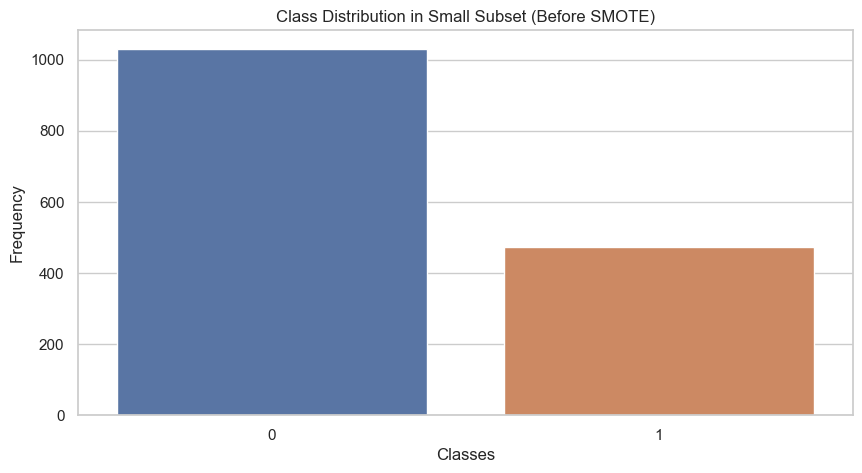

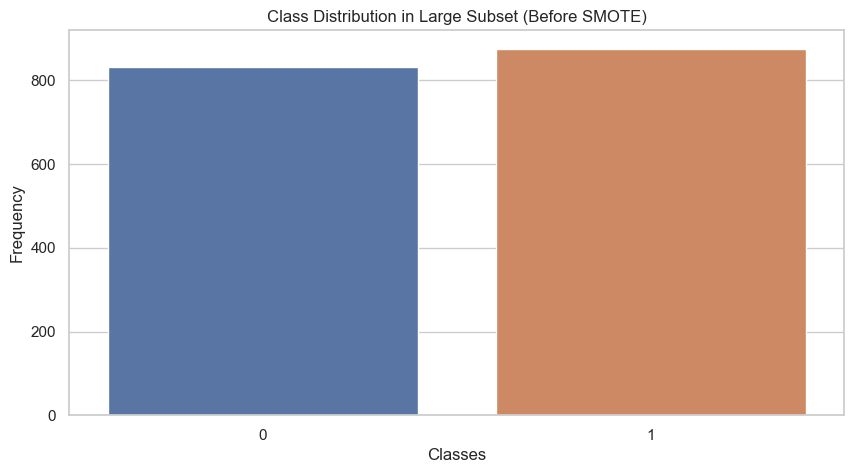

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution for small subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_s)
plt.title("Class Distribution in Small Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()

# Plot class distribution for large subset
plt.figure(figsize=(10, 5))
sns.countplot(x=y_train_l)
plt.title("Class Distribution in Large Subset (Before SMOTE)")
plt.xlabel("Classes")
plt.ylabel("Frequency")
plt.show()


In [17]:
print("Small Subset Class Distribution:")
print(y_train_s.value_counts())

print("Large Subset Class Distribution:")
print(y_train_l.value_counts())


Small Subset Class Distribution:
bug-prone
0    1031
1     473
Name: count, dtype: int64
Large Subset Class Distribution:
bug-prone
1    876
0    832
Name: count, dtype: int64


In [18]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to small subset
X_train_resampled_s, y_train_resampled_s = smote.fit_resample(X_train_scaled_s, y_train_s)

# Apply SMOTE to large subset
X_train_resampled_l, y_train_resampled_l = smote.fit_resample(X_train_scaled_l, y_train_l)



In [19]:
print("Small Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_s).value_counts())

print("Large Subset Class Distribution After SMOTE:")
print(pd.Series(y_train_resampled_l).value_counts())


Small Subset Class Distribution After SMOTE:
bug-prone
1    1031
0    1031
Name: count, dtype: int64
Large Subset Class Distribution After SMOTE:
bug-prone
1    876
0    876
Name: count, dtype: int64


In [20]:
X_train_s = X_train_resampled_s
y_train_s = y_train_resampled_s
X_test_s = X_test_scaled_s 
y_test_s = y_test_s

X_train_l = X_train_resampled_l
y_train_l = y_train_resampled_l
X_test_l = X_test_scaled_l 
y_test_l = y_test_l


In [21]:
import numpy as np
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import RadiusNeighborsClassifier

# Build models for SMALL group
models_small = {
    "RandomForest": RandomForestClassifier(n_estimators=179, random_state=42,
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3),
    "KNeighbors": KNeighborsClassifier(n_neighbors=2, algorithm='auto', metric='manhattan', p=3, weights='distance'),
    "GradientBoosting": GradientBoostingClassifier(loss='exponential', n_estimators=165, random_state=42, 
                                             learning_rate=0.1956637125175451, max_depth=19, max_features='log2', 
                                             min_samples_leaf=3, min_samples_split=2, subsample=0.7177795568278342),
    "RadiusNeighborsClassifier" : RadiusNeighborsClassifier(algorithm='ball_tree', metric='euclidean', outlier_label=0, p=1, 
                                               radius=1.139042610623814, weights='distance'),
    "MLP": MLPClassifier(activation='tanh', alpha=0.0006808361216819947, batch_size='auto', 
                                 hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.012058449429580245, max_iter=969, random_state=42, solver='sgd')
    
}

probabilities_s = []
for name, model in models_small.items():
    print(f"Training {name}...")
    # Train traditional ML models
    model.fit(X_train_s, y_train_s)
    y_pred_proba = model.predict_proba(X_test_s)[:, 1]
    probabilities_s.append(y_pred_proba)
    print(f"Accuracy ({name}): {accuracy_score(y_test_s, (y_pred_proba > 0.5).astype(int)):.4f}")



# Build models for LARGE group
print("\nResults for LARGE group:")
models_large = {
    "RandomForest": RandomForestClassifier(n_estimators=179, random_state=42, 
                                        bootstrap=False, max_depth=None, min_samples_leaf=1, min_samples_split=3),
    "KNeighbors": KNeighborsClassifier(n_neighbors=2, algorithm='auto', metric='manhattan', p=3, weights='distance'),
    "GradientBoosting": GradientBoostingClassifier(loss='exponential', n_estimators=165, random_state=42, 
                                             learning_rate=0.1956637125175451, max_depth=19, max_features='log2', 
                                             min_samples_leaf=3, min_samples_split=2, subsample=0.7177795568278342),
    "RadiusNeighborsClassifier" : RadiusNeighborsClassifier(algorithm='ball_tree', metric='manhattan', outlier_label=1, p=2, 
                                               radius=9.330198957407324, weights='distance'),
    "MLP": MLPClassifier(activation='tanh', alpha=0.0006808361216819947, batch_size='auto', 
                                 hidden_layer_sizes=(50, 100, 50), learning_rate='adaptive', 
                                 learning_rate_init=0.012058449429580245, max_iter=969, random_state=42, solver='sgd')
}

probabilities_l = []
for name, model in models_large.items():
    print(f"Training {name}...")    
    # Train traditional ML models
    model.fit(X_train_l, y_train_l)
    y_pred_proba = model.predict_proba(X_test_l)[:, 1]
    probabilities_l.append(y_pred_proba)
    print(f"Accuracy ({name}): {accuracy_score(y_test_l, (y_pred_proba > 0.5).astype(int)):.4f}")




Training RandomForest...
Accuracy (RandomForest): 0.7825
Training KNeighbors...
Accuracy (KNeighbors): 0.8090
Training GradientBoosting...
Accuracy (GradientBoosting): 0.7851
Training RadiusNeighborsClassifier...
Accuracy (RadiusNeighborsClassifier): 0.7401
Training MLP...
Accuracy (MLP): 0.7639

Results for LARGE group:
Training RandomForest...
Accuracy (RandomForest): 0.7213
Training KNeighbors...
Accuracy (KNeighbors): 0.6604
Training GradientBoosting...
Accuracy (GradientBoosting): 0.7237
Training RadiusNeighborsClassifier...
Accuracy (RadiusNeighborsClassifier): 0.7026
Training MLP...
Accuracy (MLP): 0.6909


In [22]:
# Average probabilities for small group
avg_proba_s = np.mean(probabilities_s, axis=0)

# Average probabilities for large group
avg_proba_l = np.mean(probabilities_l, axis=0)


In [23]:
# Combine probabilities and ground truths
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
final_pred = (final_proba >= 0.5).astype(int)

# Evaluate combined results
print("\nFinal Combined Results:")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")

# Final Combined Results:
# Accuracy: 0.75
# Precision: 0.70
# Recall: 0.69
# F1-Score: 0.70


Final Combined Results:
Accuracy: 0.75
Precision: 0.70
Recall: 0.69
F1-Score: 0.70


In [24]:
from sklearn.metrics import (
    roc_curve, roc_auc_score, accuracy_score, precision_score,
    recall_score, f1_score, matthews_corrcoef
)

def get_optimal_threshold(y_true, y_proba):
    """
    Compute the optimal threshold using Youden's Index.
    """
    fpr, tpr, thresholds = roc_curve(y_true, y_proba)
    youden_index = tpr - fpr
    optimal_idx = np.argmax(youden_index)
    optimal_threshold = thresholds[optimal_idx]
    return optimal_threshold

# Combine probabilities and ground truths for evaluation
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)

# Get optimal threshold using Youden's Index
optimal_threshold = get_optimal_threshold(final_y_test, final_proba)
print(f"Optimal Threshold using Youden's Index: {optimal_threshold:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= optimal_threshold).astype(int)

# Evaluate combined results
print("\nFinal Combined Results (Using Optimal Threshold):")
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.2f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.2f}")

# Optimal Threshold using Youden's Index: 0.4325

# Final Combined Results (Using Optimal Threshold):
# Accuracy: 0.77
# Precision: 0.70
# Recall: 0.76
# F1-Score: 0.73
# MCC: 0.53
# AUC: 0.85

Optimal Threshold using Youden's Index: 0.4325

Final Combined Results (Using Optimal Threshold):
Accuracy: 0.77
Precision: 0.70
Recall: 0.76
F1-Score: 0.73
MCC: 0.53
AUC: 0.85


In [25]:
# Combine probabilities and ground truths for evaluation
final_proba = np.concatenate((avg_proba_s, avg_proba_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)

from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)
print(f"Optimal Threshold (Precision-Recall Curve): {best_threshold_pr:.4f}")

# Apply the optimal threshold for predictions
final_pred = (final_proba >= best_threshold_pr).astype(int)


# Evaluate combined results
print(f"Accuracy: {accuracy_score(final_y_test, final_pred):.2f}")
print(f"Precision: {precision_score(final_y_test, final_pred):.2f}")
print(f"Recall: {recall_score(final_y_test, final_pred):.2f}")
print(f"F1-Score: {f1_score(final_y_test, final_pred):.2f}")
print(f"MCC: {matthews_corrcoef(final_y_test, final_pred):.2f}")
print(f"AUC: {roc_auc_score(final_y_test, final_proba):.2f}")

# Optimal Threshold (Precision-Recall Curve): 0.4325
# Accuracy: 0.77
# Precision: 0.70
# Recall: 0.76
# F1-Score: 0.73
# MCC: 0.53
# AUC: 0.85

Optimal Threshold (Precision-Recall Curve): 0.4325
Accuracy: 0.77
Precision: 0.70
Recall: 0.76
F1-Score: 0.73
MCC: 0.53
AUC: 0.85


In [26]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
from scipy.stats import mode
import numpy as np

# Convert probabilities to binary predictions using threshold 
predictions_s = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities_s])
predictions_l = np.array([(probs > best_threshold_pr).astype(int) for probs in probabilities_l])


majority_vote_s = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_s)
majority_vote_l = np.apply_along_axis(lambda x: np.bincount(x).argmax(), axis=0, arr=predictions_l)

# Combine majority votes for evaluation
final_predictions = np.concatenate((majority_vote_s, majority_vote_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using average probabilities
combined_probs = np.concatenate((avg_proba_s, avg_proba_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# Accuracy: 0.75
# Precision: 0.69
# Recall: 0.74
# F1-Score: 0.71
# MCC: 0.50
# AUC: 0.85

Accuracy: 0.75
Precision: 0.69
Recall: 0.74
F1-Score: 0.71
MCC: 0.50
AUC: 0.85


In [27]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef, roc_auc_score
)
import numpy as np


# "RandomForest": 
# "KNeighbors"
# "GradientBoosting"
# "RadiusNeighborsClassifier"
# "MLP"


# Example AUC scores from cross-validation
auc_scores_s = [0.9600, 0.9105, 0.9620, 0.9261, 0.9343]
auc_scores_l = [0.8978, 0.8508, 0.8972, 0.7788, 0.8381]

# Normalize AUC scores to get weights
weights_s = [score / sum(auc_scores_s) for score in auc_scores_s]
weights_l = [score / sum(auc_scores_l) for score in auc_scores_l]

# Compute weighted average probabilities
combined_probs_s = np.sum([weight * probs for weight, probs in zip(weights_s, probabilities_s)], axis=0)
combined_probs_l = np.sum([weight * probs for weight, probs in zip(weights_l, probabilities_l)], axis=0)



from sklearn.metrics import precision_recall_curve

def get_best_threshold_precision_recall(y_true, y_proba):
    precision, recall, thresholds = precision_recall_curve(y_true, y_proba)
    f1_scores = 2 * (precision * recall) / (precision + recall)
    f1_scores = np.nan_to_num(f1_scores)
    best_threshold = thresholds[np.argmax(f1_scores)]
    return best_threshold

final_proba = np.concatenate((combined_probs_s, combined_probs_l), axis=0)
final_y_test = np.concatenate((y_test_s, y_test_l), axis=0)
best_threshold_pr = get_best_threshold_precision_recall(final_y_test, final_proba)



# Convert probabilities to binary predictions using threshold
predictions_s = (combined_probs_s > best_threshold_pr).astype(int)
predictions_l = (combined_probs_l > best_threshold_pr).astype(int)

# Combine predictions and ground truth
final_predictions = np.concatenate((predictions_s, predictions_l))
final_ground_truth = np.concatenate((y_test_s, y_test_l))

# Compute AUC using combined probabilities
combined_probs = np.concatenate((combined_probs_s, combined_probs_l))

# Evaluate performance metrics
accuracy = accuracy_score(final_ground_truth, final_predictions)
precision = precision_score(final_ground_truth, final_predictions)
recall = recall_score(final_ground_truth, final_predictions)
f1 = f1_score(final_ground_truth, final_predictions)
mcc = matthews_corrcoef(final_ground_truth, final_predictions)
auc = roc_auc_score(final_ground_truth, combined_probs)

# Print evaluation results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1:.2f}")
print(f"MCC: {mcc:.2f}")
print(f"AUC: {auc:.2f}")

# Accuracy: 0.77
# Precision: 0.70
# Recall: 0.76
# F1-Score: 0.73
# MCC: 0.53
# AUC: 0.85

Accuracy: 0.77
Precision: 0.70
Recall: 0.76
F1-Score: 0.73
MCC: 0.53
AUC: 0.85
